In [241]:
import pandas as pd

from collections import Counter

import re

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nrclex import NRCLex

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import PorterStemmer

import spacy

from langdetect import detect

#import nlp

import langid

import collections

from langdetect.lang_detect_exception import LangDetectException

import locationtagger

from wordcloud import WordCloud

import gensim

from gensim.utils import simple_preprocess

import nltk

from nltk.corpus import stopwords

from gensim.models.ldamulticore import LdaMulticore

import gensim.corpora as corpora

import gensim.corpora as MmCorpus

from gensim import models

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [242]:
df = pd.read_csv('df_dinal.csv')

In [243]:
df.head(5000)

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location
0,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqHKmO-vNQu/,NaN,True story. 💜💫\n\n@beflawlessskin will make yo...,NaN
1,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqB1sDtN2gG/,NaN,Taking notes on that “el que quiere puede” min...,NaN
2,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqBkI9MNZhR/,NaN,GRACIAS MEXICO!!!!! ❤️‍🔥😭🙌🏻\n@monitorlatino_\n...,NaN
3,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqBSU7ev5bz/,NaN,We don’t talk about this enough in the Latine ...,NaN
4,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqBN0PYJpgE/,NaN,I’m so honored to be celebrating #WomensHistor...,NaN
...,...,...,...,...,...,...,...
4995,ugg,"1,521,411",UGG®\nClothing (brand)\nFor those who refuse t...,https://www.instagram.com/p/CqIy_YvtVr3/,NaN,Already thinking about our weekend outfits. 🤔\...,NaN
4996,ugg,"1,521,411",UGG®\nClothing (brand)\nFor those who refuse t...,https://www.instagram.com/p/CqGMY16pLAe/,NaN,festival season has arrived 🎡🎉🤍 which #UGG fit...,"Los Angeles, California"
4997,ugg,"1,521,411",UGG®\nClothing (brand)\nFor those who refuse t...,https://www.instagram.com/p/CqGCXA2J6Hu/,NaN,Day dreaming about the UGG x Susan Fang collab...,NaN
4998,ugg,"1,521,411",UGG®\nClothing (brand)\nFor those who refuse t...,https://www.instagram.com/p/CqDpAxZN7Ml/,NaN,Tell a friend to tell a friend that it's Aries...,NaN


In [244]:
df = df.drop_duplicates()

In [245]:
df

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location
0,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqHKmO-vNQu/,NaN,True story. 💜💫\n\n@beflawlessskin will make yo...,NaN
1,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqB1sDtN2gG/,NaN,Taking notes on that “el que quiere puede” min...,NaN
2,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqBkI9MNZhR/,NaN,GRACIAS MEXICO!!!!! ❤️‍🔥😭🙌🏻\n@monitorlatino_\n...,NaN
3,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqBSU7ev5bz/,NaN,We don’t talk about this enough in the Latine ...,NaN
4,chiquis,"5,721,916",Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...,https://www.instagram.com/p/CqBN0PYJpgE/,NaN,I’m so honored to be celebrating #WomensHistor...,NaN
...,...,...,...,...,...,...,...
27933,wisdm,NaN,"Wisdom Kaye\nDirector, stylist, photographer, ...",https://www.instagram.com/p/CqOMASSOM8i/,botshelllloo,When worlds collide #puma X #finalfantasyXIV #...,NaN
27934,wisdm,NaN,"Wisdom Kaye\nDirector, stylist, photographer, ...",https://www.instagram.com/p/CqB2J9oPmJB/,734.601 Me gusta,High Fashion Phineas and Ferb 👀\nHad alot of f...,NaN
27935,wisdm,NaN,"Wisdom Kaye\nDirector, stylist, photographer, ...",https://www.instagram.com/p/Cp_RDoqMKPg/,lyricreneee,I’m going to post this jacket like 20 more times,NaN
27936,wisdm,NaN,"Wisdom Kaye\nDirector, stylist, photographer, ...",https://www.instagram.com/p/Cp8QxZ7Ovjv/,pedrozeo,Most sane fashion enjoyer:,NaN


In [246]:
df = df.fillna('')

In [247]:
df['followers'] = df['followers'].astype(str)
df['likes'] = df['likes'].astype(str)
grouped = df.groupby(['user_Name', 'followers', 'user_Description'])
print(grouped)

In [248]:
merged = grouped.agg({'post_Url': lambda x: ','.join(x), 'likes': lambda x: ','.join(x), 'post_Description': lambda x: ','.join(x), 'post_Location': lambda x: ','.join(x)})

In [249]:
df = merged.reset_index()

In [250]:
df

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location
0,,,,",https://www.instagram.com/p/CpXBf9UPJHa/,http...",",427,992,338,316,263,013,957,748,646,264,615,0...",",Just conducted a super-energetic session with...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Milan, Italy,Mi..."
1,,,hstyles.lnk.to/harryshouse,"https://www.instagram.com/p/CqYM_uTIUVh/,https...","2.174.867 Me gusta,2.690.104 Me gusta,4.055.27...","Love On Tour. Tokyo II. March, 2023.,Love On T...",",,,,,,,,,"
2,,"2,570,070",,"https://www.instagram.com/p/CqH7CuDDA9K/,https...","90,831,112,554,119,987,634,260,192,421,214,326...","Har kahani ke do pehlu hote hain,Sach aur Jhoo...",",,,,,,,,,"
3,0nlyfitgirls_,,⭕️nlyFitGirls\nBlogger\n12 years sharing the w...,"https://www.instagram.com/p/CqbVLmrjEKV/,https...","396 likes,4,300 likes,346 likes,1,134 likes,8,...","@anabra7\n#OnlyFitGirls,@daniellebrandon7\n#On...",",,,,,,,,,"
4,100de100marifet,,Öznur Uslu\n🇹🇷Türkiye-🇫🇷 Fransa\nYeni ve deta...,"https://www.instagram.com/p/ClWkdFID3TI/,https...","7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...",Video’mu görenlerden ricam yoruma bir ❤️ koyab...,",,,,,,,,,"
...,...,...,...,...,...,...,...
2230,zubairatukhugov,,Zubaira Tukhugov\nUFC Fighter 19-4 Record\n•\n...,"https://www.instagram.com/p/CqazvpjMM5l/,https...","4,508 likes,89,193 likes,50,204 likes,47,365 l...",Нереальный вкус @gorillaenergy @gorillafightin...,",,,,,,,,,"
2231,zubbymichael,"5,749,589",zubby michael\nActor\nhttps://youtu.be/drTnOhf...,"https://www.instagram.com/p/CqMJCMXjlCF/,https...",",,,,,,,,,",Midnight cruise 🔥GOD is real #ZM #A1 #doings #...,",,,,,,,,,"
2232,zvezdegranda,,Zvezde Granda\nTV Programme\ngrand.nova.rs,"https://www.instagram.com/p/CqV3wt4KAq-/,https...","717 likes,838 likes,1,766 likes,3,765 likes,1,...",Sa kim to @voja.nedeljkovic obara ruke u Zvezd...,",,,,,,,,,"
2233,zyzzmad,,Aziz Zyzz shavershian\nComunidad\n| motivation...,"https://www.instagram.com/p/CoppL0cIqJm/,https...","144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...",",Zyzz last vlog\n.\n.\n👉 @zyzzmad Follow : Fol...",",,,Sídney,Motivation,,Motivation,,,Motivation"


In [252]:
from googletrans import Translator

translator = Translator()
descripciones = []

for index, row in df.iterrows():
    text = row['post_Description']
    if text:
        try:
            language = detect(text)
            if language != 'en':
                translated = translator.translate(text, src=language, dest="en")
                descripcion = str(translated.text)
                descripciones.append(descripcion)
            else:
                descripciones.append(text)
        except:
            # if there is an error in translation, we can leave the original text
            descripciones.append(text)
    else:
        descripciones.append(text)

df['traducido'] = descripciones

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/188282904.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traducido'] = descripciones


In [253]:
def preprocess_text(text):

    stop_words = ['english', 'spanish', 'portuguese', 'french', 'arabic', 'indonesian', 'russian', 'italian']
    
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words(stop_words)]

    stemmer=PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [254]:
# apply the function df
df['user_Description'] = df['user_Description'].apply(preprocess_text)
df['post_Description'] = df['post_Description'].apply(preprocess_text)
df['post_Location'] = df['post_Location'].apply(preprocess_text)
df

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/1186928558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_Description'] = df['user_Description'].apply(preprocess_text)
/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/1186928558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_Description'] = df['post_Description'].apply(preprocess_text)
/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/1186928558.py:4: SettingWithCopyWarning: 
A value

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido
2205,yrf,,"yash raj film film . music . artist . core , '...","https://www.instagram.com/p/CqE_tgPICQ0/,https...","30,361 likes,26,582 likes,20,377 likes,4,916 l...",buckl ’ hit ultim rush action thrill ! 🔥 watch...,", , , , , , , , ,",Buckle up as you’re about to be hit by the ult...
2206,yungblud,,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"https://www.instagram.com/p/Cqdm3jhtXm5/,https...","182.491 Me gusta,279.956 Me gusta,113.305 Me g...",latam bhc 🖤🖤🖤 ’ rememb rest life . - full tour...,", paulo , , , paraguay , santiago , chile , bu...",LATAM BHC 🖤🖤🖤 i’ll remember this for the rest ...
2207,yusufcim,,yusuf çim icon-talent.com,"https://www.instagram.com/p/CoMrLbJLmbl/,https...","181,989 likes,149,923 likes,132,848 likes,92,2...","kısa bi tatill ❄️🎉 , , , ❄️❄️ , # tb 🌞 , ✋🌞 , ...",", ,budapest citi centr , , , , , rox cappadoci...","Short holidayl ❄️🎉 ,,, ❄️❄️,#TB 🌞, ✋🌞 ,,, I mi..."
2208,yuvrajhansofficial,"1,764,149",yuvraaj han artist manag number : - 8283089911...,"https://www.instagram.com/p/CqKzuFCDgVO/,https...","36,046,11,407,56,617,52,866,1,896,47,888,19,72...","jinna metho sangi jaavein❤️❤️ , happi bday @ m...",", , , , , ,chandigarh , india , ,goa colva bea...","Jinna Metho Sangi Jaavein❤️❤️,Happy Bday @mans..."
2209,yyc.clowns,,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"https://www.instagram.com/p/CqzamQFup_w/,https...","4893 Me gusta,6546 Me gusta,4614 Me gusta,7274...","insid angl 2023 bmw m3 competit crash recent ,...",", calgari , calgari , calgari , ,calgari , ,al...",Inside angle of the 2023 BMW M3 Competition cr...
2210,z1000_oficial,,z1000 oficial™ digit creator 🔹página ofici z10...,"https://www.instagram.com/p/CVeDmyGD-55/,https...","1,353,344 likes,468,503 likes,kh__li__l31,regi...",acharam des ronco ? 😂😂😂 @ z1000_ofici ➖➖➖➖➖➖➖➖...,", , , , , , , , ,",About Que Acharam Desse Ronco?😂😂😂\n\n@Z1000_OF...
2211,zacaynsley,,zac aynsley personaj público @ cleannutrit ath...,"https://www.instagram.com/p/ChFVF9Ojce9/,https...","112.344 Me gusta,105.738 Me gusta,8364 Me gust...","aesthet transform 💪 , alien tricep return 👽💪 ,...",", , , , , , , , ,","Aesthetic transformation 💪,Alien tricep return..."
2212,zahmuz12,"915,028","muzdalifah sportsperson endors , pp ? dm ✉️ fo...","https://www.instagram.com/p/CpRllwqSgGO/,https...",",,,,,,,,",chase dream .. soccer bring life journey meani...,"osaka , japan 大阪 , , , , , double-six seminyak...",Chasing dreams.. soccer brings this life journ...
2213,zaida_ward,,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"https://www.instagram.com/p/Cn4HvqUOHlA/,https...","uzum2771,uzum2771,uzum2771,uzum2771,uzum2771,d...",great day great weather 🌞❤️ # sun # happi # za...,", , , , , madrid , barcelona , , , madrid",Great day great weather 🌞❤️\n\n#sun #happy #za...
2214,zaidalit,,zaidalit father | content creator | actor | en...,"https://www.instagram.com/p/CmBx_bVORYN/,https...","103,418 likes,222,234 likes,283,024 likes,253,...","grow older togeth , lot habit chang one anoth ...",", , , , , , , eiffel tower , ,","As we grow older together, a lot of our habits..."


In [255]:
df['all_descriptions'] = df['user_Description'].str.cat(df['post_Description'], sep=' ')

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/738119425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_descriptions'] = df['user_Description'].str.cat(df['post_Description'], sep=' ')


In [256]:
with open('vader_lexicon.txt', 'r') as f:
    lines = f.readlines()

emotion_lexicon = {}
for line in lines:
    word, emotion, value = line.strip().split('\t')
    if word not in emotion_lexicon:
        emotion_lexicon[word] = {}
    emotion_lexicon[word][emotion] = int(value)

# Define the emotions of interest
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

# Define a function to get the emotion scores for each row
def get_emotion_scores(row):
    text = row['all_descriptions']
    emotion_scores = {e: 0 for e in emotions}
    for word in text.split():
        if word in emotion_lexicon:
            for e in emotions:
                if emotion_lexicon[word].get(e, 0) == 1:
                    emotion_scores[e] += 1
    return pd.Series(emotion_scores)

# Apply the function to each row
emotion_df = df.apply(get_emotion_scores, axis=1)

# Normalize the emotion scores using z-score
emotion_df_zscore = (emotion_df - emotion_df.mean()) / emotion_df.std()

# Add the emotion scores to the original dataframe
df_emotion = pd.concat([df, emotion_df_zscore], axis=1)

In [257]:
df_emotion.head(5)

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido,all_descriptions,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
2205,yrf,,"yash raj film film . music . artist . core , '...","https://www.instagram.com/p/CqE_tgPICQ0/,https...","30,361 likes,26,582 likes,20,377 likes,4,916 l...",buckl ’ hit ultim rush action thrill ! 🔥 watch...,", , , , , , , , ,",Buckle up as you’re about to be hit by the ult...,"yash raj film film . music . artist . core , '...",-0.150008,-0.203359,0.416665,0.016504,-0.209898,-0.231922,-0.139797,-0.092765,-0.187592,-0.735299
2206,yungblud,,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"https://www.instagram.com/p/Cqdm3jhtXm5/,https...","182.491 Me gusta,279.956 Me gusta,113.305 Me g...",latam bhc 🖤🖤🖤 ’ rememb rest life . - full tour...,", paulo , , , paraguay , santiago , chile , bu...",LATAM BHC 🖤🖤🖤 i’ll remember this for the rest ...,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,0.037502,-0.457557,1.378199,0.676658,-0.765511,0.704685,-0.605788,2.690184,-0.589574,-0.536570
2207,yusufcim,,yusuf çim icon-talent.com,"https://www.instagram.com/p/CoMrLbJLmbl/,https...","181,989 likes,149,923 likes,132,848 likes,92,2...","kısa bi tatill ❄️🎉 , , , ❄️❄️ , # tb 🌞 , ✋🌞 , ...",", ,budapest citi centr , , , , , rox cappadoci...","Short holidayl ❄️🎉 ,,, ❄️❄️,#TB 🌞, ✋🌞 ,,, I mi...",yusuf çim icon-talent.com kısa bi tatill ❄️🎉 ...,-0.150008,-0.711755,0.416665,-0.478612,-0.765511,-0.365723,-0.722285,-0.556590,-0.589574,-0.735299
2208,yuvrajhansofficial,"1,764,149",yuvraaj han artist manag number : - 8283089911...,"https://www.instagram.com/p/CqKzuFCDgVO/,https...","36,046,11,407,56,617,52,866,1,896,47,888,19,72...","jinna metho sangi jaavein❤️❤️ , happi bday @ m...",", , , , , ,chandigarh , india , ,goa colva bea...","Jinna Metho Sangi Jaavein❤️❤️,Happy Bday @mans...",yuvraaj han artist manag number : - 8283089911...,-0.337518,0.305038,-0.544869,-0.478612,1.271735,-0.365723,0.559189,-0.092765,-0.589574,0.059619
2209,yyc.clowns,,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"https://www.instagram.com/p/CqzamQFup_w/,https...","4893 Me gusta,6546 Me gusta,4614 Me gusta,7274...","insid angl 2023 bmw m3 competit crash recent ,...",", calgari , calgari , calgari , ,calgari , ,al...",Inside angle of the 2023 BMW M3 Competition cr...,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,2.100113,2.338624,1.378199,2.162005,0.716123,2.577899,1.607667,3.617834,3.430250,2.643102


In [258]:
def detect_languages(text):
    if len(text) < 10:
        return []
    try:
        lang = detect(text)
        return [lang]
    except LangDetectException:
        return []


languageslist = df["all_descriptions"].apply(detect_languages)
print(languageslist)


2205    [en]
2206    [en]
2207    [tr]
2208    [en]
2209    [en]
2210    [sl]
2211    [en]
2212    [en]
2213    [en]
2214    [en]
2215    [en]
2216    [en]
2217    [en]
2218    [en]
2219    [it]
2220    [tr]
2221    [hi]
2222    [it]
2223    [en]
2224    [so]
2225    [id]
2226    [en]
2227    [nl]
2228    [en]
2229    [ar]
2230    [ru]
2231    [en]
2232    [hr]
2233    [en]
2234    [th]
Name: all_descriptions, dtype: object


In [259]:
mylist = []
for i in languageslist:
    mylist.append(i)

print(mylist)


[['en'], ['en'], ['tr'], ['en'], ['en'], ['sl'], ['en'], ['en'], ['en'], ['en'], ['en'], ['en'], ['en'], ['en'], ['it'], ['tr'], ['hi'], ['it'], ['en'], ['so'], ['id'], ['en'], ['nl'], ['en'], ['ar'], ['ru'], ['en'], ['hr'], ['en'], ['th']]


In [260]:
freq = {}

for sublist in mylist:
    for lang in sublist:
        if lang in freq:
            freq[lang] += 1
        else:
            freq[lang] = 1

print(freq)

{'en': 17, 'tr': 2, 'sl': 1, 'it': 2, 'hi': 1, 'so': 1, 'id': 1, 'nl': 1, 'ar': 1, 'ru': 1, 'hr': 1, 'th': 1}


In [261]:
unique_values = set(value for sublist in mylist for value in sublist)

print(unique_values)

{'th', 'it', 'id', 'nl', 'hi', 'en', 'ru', 'hr', 'so', 'sl', 'ar', 'tr'}


In [262]:
import spacy

models = spacy.util.get_installed_models()

print("The following models are installed:")
for model in models:
    print(model)

The following models are installed:
es_core_news_lg
en_core_web_lg
fr_core_news_lg
it_core_news_lg
xx_ent_wiki_sm
pt_core_news_lg
en_core_web_sm
es_core_news_sm


In [289]:
nlp_english = spacy.load("en_core_web_lg")
nlp_spanish = spacy.load("es_core_news_lg")
nlp_portuguese = spacy.load("pt_core_news_lg")
nlp_french = spacy.load("fr_core_news_lg")
nlp_italian = spacy.load("it_core_news_lg")
nlp_any = spacy.load("xx_ent_wiki_sm")


def extract_locations(text):
    if len(text) < 10:  # Check if text is at least 10 characters long
        return []
    try:
        lang_code = detect(text)
    except LangDetectException:
        return []
    
    if lang_code == "en":
        nlp = nlp_english
    elif lang_code == "es":
        nlp = nlp_spanish
    elif lang_code == "pt":
        nlp = nlp_portuguese
    elif lang_code == "it":
        nlp = nlp_italian
    elif lang_code == "fr":
        nlp = nlp_french
    elif lang_code in ['ar', 'bg', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'et', 'fa', 'fi', 'fr', 'he', 'hi', 'hr', 'hu', 'id', 'it', 'ja', 'kk', 'ko', 'lt', 'lv', 'mk', 'ml', 'mr', 'nb', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sq', 'sr', 'sv', 'ta', 'th', 'tr', 'uk', 'ur', 'vi', 'zh']:
        nlp = nlp_any
    else:
        return []
    locations = locationtagger.find_locations(text = text)
    locations = locations.countries #locations.country_regions, locations.country_cities, locations.other_countries, locations.region_cities, locations.other_regions, locations.other
    return locations

df['locationsfull'] = df["all_descriptions"].apply(extract_locations)
df

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/2414274694.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locationsfull'] = df["all_descriptions"].apply(extract_locations)


,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido,all_descriptions,locationsfull,cluster,max_category
2205,yrf,,"yash raj film film . music . artist . core , '...","https://www.instagram.com/p/CqE_tgPICQ0/,https...","30,361 likes,26,582 likes,20,377 likes,4,916 l...",buckl ’ hit ultim rush action thrill ! 🔥 watch...,", , , , , , , , ,",Buckle up as you’re about to be hit by the ult...,"yah raj film film . muic . artit . core , 're ...",[],0,parenting_family
2206,yungblud,,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"https://www.instagram.com/p/Cqdm3jhtXm5/,https...","182.491 Me gusta,279.956 Me gusta,113.305 Me g...",latam bhc 🖤🖤🖤 ’ rememb rest life . - full tour...,", paulo , , , paraguay , santiago , chile , bu...",LATAM BHC 🖤🖤🖤 i’ll remember this for the rest ...,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"[argentina, chile]",0,travel
2207,yusufcim,,yusuf çim icon-talent.com,"https://www.instagram.com/p/CoMrLbJLmbl/,https...","181,989 likes,149,923 likes,132,848 likes,92,2...","kısa bi tatill ❄️🎉 , , , ❄️❄️ , # tb 🌞 , ✋🌞 , ...",", ,budapest citi centr , , , , , rox cappadoci...","Short holidayl ❄️🎉 ,,, ❄️❄️,#TB 🌞, ✋🌞 ,,, I mi...","yuuf çim icon-talent.com kıa bi tatill ❄️🎉 , ...",[],5,fitness_sport
2208,yuvrajhansofficial,"1,764,149",yuvraaj han artist manag number : - 8283089911...,"https://www.instagram.com/p/CqKzuFCDgVO/,https...","36,046,11,407,56,617,52,866,1,896,47,888,19,72...","jinna metho sangi jaavein❤️❤️ , happi bday @ m...",", , , , , ,chandigarh , india , ,goa colva bea...","Jinna Metho Sangi Jaavein❤️❤️,Happy Bday @mans...",yuvraaj han artit manag number : - 8283089911 ...,[],1,social
2209,yyc.clowns,,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"https://www.instagram.com/p/CqzamQFup_w/,https...","4893 Me gusta,6546 Me gusta,4614 Me gusta,7274...","insid angl 2023 bmw m3 competit crash recent ,...",", calgari , calgari , calgari , ,calgari , ,al...",Inside angle of the 2023 BMW M3 Competition cr...,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,[canada],2,parenting_family
2210,z1000_oficial,,z1000 oficial™ digit creator 🔹página ofici z10...,"https://www.instagram.com/p/CVeDmyGD-55/,https...","1,353,344 likes,468,503 likes,kh__li__l31,regi...",acharam des ronco ? 😂😂😂 @ z1000_ofici ➖➖➖➖➖➖➖➖...,", , , , , , , , ,",About Que Acharam Desse Ronco?😂😂😂\n\n@Z1000_OF...,z1000 oficial™ digit creator 🔹página ofici z10...,[],2,parenting_family
2211,zacaynsley,,zac aynsley personaj público @ cleannutrit ath...,"https://www.instagram.com/p/ChFVF9Ojce9/,https...","112.344 Me gusta,105.738 Me gusta,8364 Me gust...","aesthet transform 💪 , alien tricep return 👽💪 ,...",", , , , , , , , ,","Aesthetic transformation 💪,Alien tricep return...",zac aynley peronaj público @ cleannutrit athle...,[],1,social
2212,zahmuz12,"915,028","muzdalifah sportsperson endors , pp ? dm ✉️ fo...","https://www.instagram.com/p/CpRllwqSgGO/,https...",",,,,,,,,",chase dream .. soccer bring life journey meani...,"osaka , japan 大阪 , , , , , double-six seminyak...",Chasing dreams.. soccer brings this life journ...,"muzdalifah portperon endor , pp ? dm ✉️ footba...",[japan],1,fitness_sport
2213,zaida_ward,,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"https://www.instagram.com/p/Cn4HvqUOHlA/,https...","uzum2771,uzum2771,uzum2771,uzum2771,uzum2771,d...",great day great weather 🌞❤️ # sun # happi # za...,", , , , , madrid , barcelona , , , madrid",Great day great weather 🌞❤️\n\n#sun #happy #za...,zaida ward artita 📍madrid 🛍zaidaward.hop ✉️inf...,[],1,fitness_sport
2214,zaidalit,,zaidalit father | content creator | actor | en...,"https://www.instagram.com/p/CmBx_bVORYN/,https...","103,418 likes,222,234 likes,283,024 likes,253,...","grow older togeth , lot habit chang one anoth ...",", , , , , , , eiffel tower , ,","As we grow older together, a lot of our habits...",zaidalit father | content creator | actor | en...,[mexico],1,realEstate


In [265]:
df.head(20)

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido,all_descriptions,locationsfull
2205,yrf,,"yash raj film film . music . artist . core , '...","https://www.instagram.com/p/CqE_tgPICQ0/,https...","30,361 likes,26,582 likes,20,377 likes,4,916 l...",buckl ’ hit ultim rush action thrill ! 🔥 watch...,", , , , , , , , ,",Buckle up as you’re about to be hit by the ult...,"yash raj film film . music . artist . core , '...","([], [])"
2206,yungblud,,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"https://www.instagram.com/p/Cqdm3jhtXm5/,https...","182.491 Me gusta,279.956 Me gusta,113.305 Me g...",latam bhc 🖤🖤🖤 ’ rememb rest life . - full tour...,", paulo , , , paraguay , santiago , chile , bu...",LATAM BHC 🖤🖤🖤 i’ll remember this for the rest ...,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"([argentina, chile], [Argentina])"
2207,yusufcim,,yusuf çim icon-talent.com,"https://www.instagram.com/p/CoMrLbJLmbl/,https...","181,989 likes,149,923 likes,132,848 likes,92,2...","kısa bi tatill ❄️🎉 , , , ❄️❄️ , # tb 🌞 , ✋🌞 , ...",", ,budapest citi centr , , , , , rox cappadoci...","Short holidayl ❄️🎉 ,,, ❄️❄️,#TB 🌞, ✋🌞 ,,, I mi...",yusuf çim icon-talent.com kısa bi tatill ❄️🎉 ...,"([], [])"
2208,yuvrajhansofficial,"1,764,149",yuvraaj han artist manag number : - 8283089911...,"https://www.instagram.com/p/CqKzuFCDgVO/,https...","36,046,11,407,56,617,52,866,1,896,47,888,19,72...","jinna metho sangi jaavein❤️❤️ , happi bday @ m...",", , , , , ,chandigarh , india , ,goa colva bea...","Jinna Metho Sangi Jaavein❤️❤️,Happy Bday @mans...",yuvraaj han artist manag number : - 8283089911...,"([], [])"
2209,yyc.clowns,,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"https://www.instagram.com/p/CqzamQFup_w/,https...","4893 Me gusta,6546 Me gusta,4614 Me gusta,7274...","insid angl 2023 bmw m3 competit crash recent ,...",", calgari , calgari , calgari , ,calgari , ,al...",Inside angle of the 2023 BMW M3 Competition cr...,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"([canada], [March, Edmonton, Canada])"
2210,z1000_oficial,,z1000 oficial™ digit creator 🔹página ofici z10...,"https://www.instagram.com/p/CVeDmyGD-55/,https...","1,353,344 likes,468,503 likes,kh__li__l31,regi...",acharam des ronco ? 😂😂😂 @ z1000_ofici ➖➖➖➖➖➖➖➖...,", , , , , , , , ,",About Que Acharam Desse Ronco?😂😂😂\n\n@Z1000_OF...,z1000 oficial™ digit creator 🔹página ofici z10...,"([], [])"
2211,zacaynsley,,zac aynsley personaj público @ cleannutrit ath...,"https://www.instagram.com/p/ChFVF9Ojce9/,https...","112.344 Me gusta,105.738 Me gusta,8364 Me gust...","aesthet transform 💪 , alien tricep return 👽💪 ,...",", , , , , , , , ,","Aesthetic transformation 💪,Alien tricep return...",zac aynsley personaj público @ cleannutrit ath...,"([], [])"
2212,zahmuz12,"915,028","muzdalifah sportsperson endors , pp ? dm ✉️ fo...","https://www.instagram.com/p/CpRllwqSgGO/,https...",",,,,,,,,",chase dream .. soccer bring life journey meani...,"osaka , japan 大阪 , , , , , double-six seminyak...",Chasing dreams.. soccer brings this life journ...,"muzdalifah sportsperson endors , pp ? dm ✉️ fo...","([japan], [])"
2213,zaida_ward,,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"https://www.instagram.com/p/Cn4HvqUOHlA/,https...","uzum2771,uzum2771,uzum2771,uzum2771,uzum2771,d...",great day great weather 🌞❤️ # sun # happi # za...,", , , , , madrid , barcelona , , , madrid",Great day great weather 🌞❤️\n\n#sun #happy #za...,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"([], [Madrid])"
2214,zaidalit,,zaidalit father | content creator | actor | en...,"https://www.instagram.com/p/CmBx_bVORYN/,https...","103,418 likes,222,234 likes,283,024 likes,253,...","grow older togeth , lot habit chang one anoth ...",", , , , , , , eiffel tower , ,","As we grow older together, a lot of our habits...",zaidalit father | content creator | actor | en...,"([mexico], [Mexico])"


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Library/Frameworks/Python.framework/Versions/3.9/lib/pytho

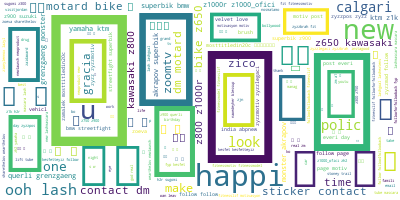

In [266]:
long_string = ','.join(list(df['all_descriptions'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [267]:
nltk.download('stopwords')

english_stopwords = set(stopwords.words('english'))
french_stopwords = set(stopwords.words('french'))
spanish_stopwords = set(stopwords.words('spanish'))
italian_stopwords = set(stopwords.words('italian'))
arabic_stopwords = set(stopwords.words('arabic'))
indonesian_stopwords = set(stopwords.words('indonesian'))
portuguese_stopwords = set(stopwords.words('portuguese'))
russian_stopwords = set(stopwords.words('russian'))

all_stopwords = english_stopwords.union(french_stopwords, spanish_stopwords, italian_stopwords, arabic_stopwords, indonesian_stopwords, portuguese_stopwords, russian_stopwords)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in all_stopwords] for doc in texts]
data_words = []

for row in df['all_descriptions']:
    tokens = list(sent_to_words([row]))
    tokens = remove_stopwords(tokens)
    data_words.append(tokens[0])

# print the first 30 tokens from the first row of preprocessed data
print(data_words[0][:30])

['yash', 'raj', 'film', 'film', 'music', 'artist', 'core', 'storytel', 'celebr', 'legaci', 'yrf', 'pathaan', 'book', 'ticket', 'bookmy', 'show', 'pathaan', 'buckl', 'hit', 'ultim', 'rush', 'action', 'thrill', 'watch', 'pathaanonprim', 'hindi', 'tamil', 'telugu', 'iamsrk', 'deepikapadukon']


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [268]:
import gensim.corpora as corpora
# We create the dictionary.
id2word = corpora.Dictionary(data_words)
id2word.save('dictionary.gensim')
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(word) for word in texts]
print(corpus[:1][0][:10]) #(word_id, word_count)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 4), (9, 4)]


In [269]:
corpora.MmCorpus.serialize('corpus.mm', corpus)
corpus = corpora.MmCorpus('corpus.mm')
dictionary = corpora.Dictionary.load('dictionary.gensim')

# Train LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=35, workers=4)

# Print the topics and their most significant words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

Topic: 0 
Words: 0.009*"happi" + 0.007*"love" + 0.006*"time" + 0.006*"japan" + 0.005*"make" + 0.005*"dream" + 0.005*"new" + 0.005*"best" + 0.005*"pair" + 0.004*"thank"
Topic: 1 
Words: 0.010*"lash" + 0.008*"zoeva" + 0.008*"calgari" + 0.007*"new" + 0.007*"mascara" + 0.007*"polic" + 0.006*"lift" + 0.005*"ooh" + 0.005*"love" + 0.005*"one"
Topic: 2 
Words: 0.016*"पर" + 0.006*"love" + 0.005*"कर" + 0.005*"हए" + 0.005*"jawein" + 0.005*"thank" + 0.004*"sangi" + 0.004*"अपन" + 0.004*"india" + 0.004*"abpnew"
Topic: 3 
Words: 0.010*"zoomtv" + 0.009*"bollywood" + 0.007*"haz" + 0.006*"bir" + 0.006*"magnum" + 0.006*"entertain" + 0.006*"पर" + 0.005*"zoompapz" + 0.004*"polic" + 0.003*"deneyim"
Topic: 4 
Words: 0.013*"pinto" + 0.010*"visitjordan" + 0.010*"tattoomadrid" + 0.006*"tattoo" + 0.006*"gracia" + 0.005*"disneytattoo" + 0.005*"gracias" + 0.004*"jordani" + 0.004*"blacktattoo" + 0.003*"blackwork"
Topic: 5 
Words: 0.033*"blessup" + 0.033*"zm" + 0.033*"nawedeyher" + 0.029*"real" + 0.029*"god" + 0.008

In [270]:
topics = lda_model.show_topics(num_topics=35, num_words=70, formatted=False)
for topic in topics:
    print("Topic", topic[0]+1, ":", [word[0] for word in topic[1]])

Topic 1 : ['happi', 'love', 'time', 'japan', 'make', 'dream', 'new', 'best', 'pair', 'thank', 'get', 'lash', 'mascara', 'life', 'bring', 'commun', 'need', 'zane', 'team', 'train', 'travel', 'natur', 'one', 'dm', 'sangi', 'sit', 'sock', 'eyebrow', 'zoeva', 'year', 'old', 'back', 'tuh', 'better', 'journey', 'gimana', 'repres', 'pp', 'never', 'cerezo_ladi', 'turn', 'endors', 'start', 'habit', 'menang', 'muzdalifah', 'anoth', 'berhak', 'पर', 'stop', 'wast', 'ooh', 'pairofthiev', 'surf', 'quit', 'sedih', 'kalah', 'sportsperson', 'chase', 'power', 'footbal', 'ur', 'meaning', 'opportun', 'preciou', 'soccer', 'messi', 'live', 'bucket', 'pain']
Topic 2 : ['lash', 'zoeva', 'calgari', 'new', 'mascara', 'polic', 'lift', 'ooh', 'love', 'one', 'sharethelov', 'velvet', 'vehicl', 'brush', 'newproduct', 'stoney', 'eyeshadow', 'trail', 'tube', 'wearthelov', 'drug', 'newlaunch', 'make', 'lashmascara', 'life', 'lashgoal', 'oohlala', 'oohlalength', 'viu', 'car', 'cocain', 'look', 'sayoohlala', 'like', 'bir

In [271]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# assuming you have already trained your LDA model and saved it as 'lda_model'

# convert the LDA model to a gensim format
gensim_lda = gensimvis.prepare(lda_model, corpus, dictionary)

# visualize the model
pyLDAvis.display(gensim_lda)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [272]:
stop_words = ['english', 'spanish', 'portuguese', 'french', 'arabic', 'indonesian', 'russian', 'italian']

vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(df['all_descriptions'])

In [273]:
k = 6 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [274]:
df['cluster'] = y_pred
df

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/3710322972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_pred


,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido,all_descriptions,locationsfull,cluster
2205,yrf,,"yash raj film film . music . artist . core , '...","https://www.instagram.com/p/CqE_tgPICQ0/,https...","30,361 likes,26,582 likes,20,377 likes,4,916 l...",buckl ’ hit ultim rush action thrill ! 🔥 watch...,", , , , , , , , ,",Buckle up as you’re about to be hit by the ult...,"yash raj film film . music . artist . core , '...","([], [])",0
2206,yungblud,,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"https://www.instagram.com/p/Cqdm3jhtXm5/,https...","182.491 Me gusta,279.956 Me gusta,113.305 Me g...",latam bhc 🖤🖤🖤 ’ rememb rest life . - full tour...,", paulo , , , paraguay , santiago , chile , bu...",LATAM BHC 🖤🖤🖤 i’ll remember this for the rest ...,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"([argentina, chile], [Argentina])",0
2207,yusufcim,,yusuf çim icon-talent.com,"https://www.instagram.com/p/CoMrLbJLmbl/,https...","181,989 likes,149,923 likes,132,848 likes,92,2...","kısa bi tatill ❄️🎉 , , , ❄️❄️ , # tb 🌞 , ✋🌞 , ...",", ,budapest citi centr , , , , , rox cappadoci...","Short holidayl ❄️🎉 ,,, ❄️❄️,#TB 🌞, ✋🌞 ,,, I mi...",yusuf çim icon-talent.com kısa bi tatill ❄️🎉 ...,"([], [])",5
2208,yuvrajhansofficial,"1,764,149",yuvraaj han artist manag number : - 8283089911...,"https://www.instagram.com/p/CqKzuFCDgVO/,https...","36,046,11,407,56,617,52,866,1,896,47,888,19,72...","jinna metho sangi jaavein❤️❤️ , happi bday @ m...",", , , , , ,chandigarh , india , ,goa colva bea...","Jinna Metho Sangi Jaavein❤️❤️,Happy Bday @mans...",yuvraaj han artist manag number : - 8283089911...,"([], [])",1
2209,yyc.clowns,,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"https://www.instagram.com/p/CqzamQFup_w/,https...","4893 Me gusta,6546 Me gusta,4614 Me gusta,7274...","insid angl 2023 bmw m3 competit crash recent ,...",", calgari , calgari , calgari , ,calgari , ,al...",Inside angle of the 2023 BMW M3 Competition cr...,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"([canada], [March, Edmonton, Canada])",2
2210,z1000_oficial,,z1000 oficial™ digit creator 🔹página ofici z10...,"https://www.instagram.com/p/CVeDmyGD-55/,https...","1,353,344 likes,468,503 likes,kh__li__l31,regi...",acharam des ronco ? 😂😂😂 @ z1000_ofici ➖➖➖➖➖➖➖➖...,", , , , , , , , ,",About Que Acharam Desse Ronco?😂😂😂\n\n@Z1000_OF...,z1000 oficial™ digit creator 🔹página ofici z10...,"([], [])",2
2211,zacaynsley,,zac aynsley personaj público @ cleannutrit ath...,"https://www.instagram.com/p/ChFVF9Ojce9/,https...","112.344 Me gusta,105.738 Me gusta,8364 Me gust...","aesthet transform 💪 , alien tricep return 👽💪 ,...",", , , , , , , , ,","Aesthetic transformation 💪,Alien tricep return...",zac aynsley personaj público @ cleannutrit ath...,"([], [])",1
2212,zahmuz12,"915,028","muzdalifah sportsperson endors , pp ? dm ✉️ fo...","https://www.instagram.com/p/CpRllwqSgGO/,https...",",,,,,,,,",chase dream .. soccer bring life journey meani...,"osaka , japan 大阪 , , , , , double-six seminyak...",Chasing dreams.. soccer brings this life journ...,"muzdalifah sportsperson endors , pp ? dm ✉️ fo...","([japan], [])",1
2213,zaida_ward,,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"https://www.instagram.com/p/Cn4HvqUOHlA/,https...","uzum2771,uzum2771,uzum2771,uzum2771,uzum2771,d...",great day great weather 🌞❤️ # sun # happi # za...,", , , , , madrid , barcelona , , , madrid",Great day great weather 🌞❤️\n\n#sun #happy #za...,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"([], [Madrid])",1
2214,zaidalit,,zaidalit father | content creator | actor | en...,"https://www.instagram.com/p/CmBx_bVORYN/,https...","103,418 likes,222,234 likes,283,024 likes,253,...","grow older togeth , lot habit chang one anoth ...",", , , , , , , eiffel tower , ,","As we grow older together, a lot of our habits...",zaidalit father | content creator | actor | en...,"([mexico], [Mexico])",1


In [275]:
print(df.groupby('cluster').size())

cluster
0     4
1    12
2     2
3     5
4     5
5     2
dtype: int64


In [276]:
cluster_17_data = df[df['cluster'] == 4]
cluster_17_data

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido,all_descriptions,locationsfull,cluster
2219,zeliaruiztattoo,,zelia ruiz 🧜🏻‍♀️ tattoo & pierc shop salvador ...,"https://www.instagram.com/p/CpfQV_poeKM/,https...","84 likes,98 likes,68 likes,232 likes,107 likes...",🕯🕰 # dindon cri 🤎gracias💛 # beautyandthebeast ...,"salvador tattoo , salvador tattoo , salvador t...",🕯🕰 #Dindon Para Cris 🤎vertcias💛 #beautyandtheb...,zelia ruiz 🧜🏻‍♀️ tattoo & pierc shop salvador ...,"([el salvador], [Madrid, El Salvador])",4
2221,zico,"3,647,618",arthur antun coimbra email : atendimento @ zic...,"https://www.instagram.com/p/CqODh5Qr6DF/,https...","1,563,4,442,30,536,13,404,4,353,2,002,17,463,7...",campeõ premiaçõ individuai realizada hoje @ vi...,"vila olímpica clara nune , , , , , rio janeiro...",Campeões e premiações individuais realizadas h...,arthur antun coimbra email : atendimento @ zic...,"([india], [Mumbai, Jogo, Congress])",4
2222,zionylennox,,zion & lennox artist babi record inc. p. acoun...,"https://www.instagram.com/p/CqL4kSEvZo5/,https...","646 likes,809 likes,1,586 likes,7,376 likes,1,...",@ siriusxm chanc see artist confidenti @ ziony...,", , , , , , , , ,",@siriusxm has YOUR chance to see an Artist Con...,zion & lennox artist babi record inc. p. acoun...,"([mexico, ecuador], [Miami, Mexico])",4
2225,zoeabbasjackson,,zoe abba jackson ♡ personaj público daydream n...,"https://www.instagram.com/p/CqIKHFlr_Ra/,https...","25.942 Me gusta,81.263 Me gusta,25.373 Me gust...",pertemuannya ayna hati gu afif bergetar . kisa...,", , , , , dunia tipu tipu , , , ,",His meeting with Ayna was able to make Gus Afi...,zoe abba jackson ♡ personaj público daydream n...,"([], [])",4
2232,zvezdegranda,,zvezd granda tv programm grand.nova.r,"https://www.instagram.com/p/CqV3wt4KAq-/,https...","717 likes,838 likes,1,766 likes,3,765 likes,1,...",kim @ voja.nedeljkov obara ruke u zvezdama gra...,", , , , , , , , ,",With whom to @voja.Nedeljkovic's hands in the ...,zvezd granda tv programm grand.nova.r kim @ vo...,"([], [Dana])",4


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


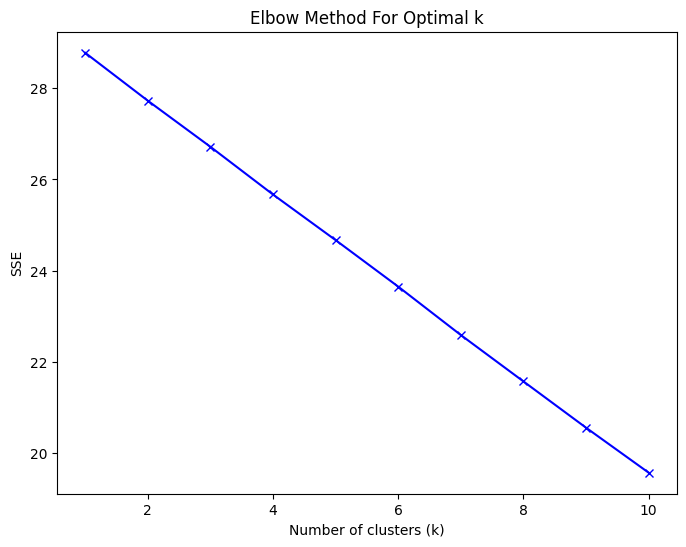

In [277]:
# Define a range of k values
k_values = range(1, 11)

vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(df['all_descriptions'])
# Fit KMeans and calculate SSE for each k value
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse_values.append(kmeans.inertia_)

# Plot the SSE values against the k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [278]:
def count_words(text):
    words = re.findall('\w+', text.lower())
    return Counter(words)

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/3727510277.py:2: DeprecationWarning: invalid escape sequence \w
  words = re.findall('\w+', text.lower())


In [279]:
all_text = ' '.join(df['all_descriptions'])

In [280]:
word_count = count_words(all_text)

In [281]:
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
len(sorted_words)

3205

In [282]:
mywords = []
for word, count in sorted_words[:35]:
    print(word)
    mywords.append(word)
    

क
र
ह
न
स
द
ल
म
त
प
य
ज
ब
ग
follow
व
पर
lash
ए
love
new
श
superbik
motiv
mascara
ध
z900
ooh
fitnesslif
happi
day
zoeva
s
ट
like


In [283]:
def delete_words(text):
    for word in mywords:
        if word in text:
            text = text.replace(word, '')
    return text

# Apply the function to the column
df['all_descriptions'] = df['all_descriptions'].apply(lambda x: delete_words(x))

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/3790888138.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_descriptions'] = df['all_descriptions'].apply(lambda x: delete_words(x))


In [284]:
import os

folder_path = '/Users/beltran/Desktop/influence_marketing/influence_marketing_reco/datasets/categories'

files = [os.path.splitext(f)[0] for f in os.listdir(folder_path)]

print(files)

['fitness_sport', 'music', 'gaming', 'finance_investing', 'belleza', 'luxury_lifestyle', 'cars_motorcycles', 'science', 'realEstate', 'travel', 'humor_memes', 'art_design', 'food_cooking', 'fashion', 'education', 'politics', 'social', 'culture', 'technology', 'parenting_family', 'business', 'pets', 'nature']


In [285]:
import os

folder_path = '/Users/beltran/Desktop/influence_marketing/influence_marketing_reco/datasets/categories'
lists_dict = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.txt'):
        list_name = os.path.splitext(filename)[0]
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f.readlines()]
            lists_dict[list_name] = lines

print(lists_dict)

for key in lists_dict.keys():
    print(key)

{'fitness_sport': ['health', 'suit', 'accommodate', 'fulfill', 'go', 'workout', 'agree', 'fitness', 'lifestyle', 'set', 'suited', 'meet', 'strength', 'be', 'fulfil', 'gym', 'suitable', 'motorize', 'check', 'satisfy', 'appropriate', 'running', 'physique', 'match', 'exercise', 'sports', 'conform to', 'tantrum', 'able', 'dovetail', 'nutrition', 'ready', 'healthy', 'shape', 'trainer', 'diet', 'parallel', 'adapt', 'fun', 'muscle', 'weight', 'athlete', 'wellness', 'correspond', 'body', 'lifting', 'burst', 'acceptable', 'activity', 'look', 'fill', 'conditioning', 'cardio', 'bodybuilder', 'weightlifting', 'harmonise', 'athletics', 'calisthenics', 'aesthetic', 'nutritional', 'consort', 'concord', 'dance', 'adjust', 'provide', 'yoga', 'sport', 'harmonize', 'gyms', 'supply', 'living', 'training', 'refit', 'food', 'answer', 'form', 'smartwatch', 'conditioned', 'endurance', 'athletic', 'books', 'able-bodied', 'weightloss', 'performance', 'games', 'boxing', 'size', 'attractiveness', 'urban', 'in con

In [287]:
max_categories = []

# loop through each row of the dataframe and calculate the category with the highest count
for index, row in df.iterrows():
    # create a dictionary to store the counts for each category
    counts = {key: 0 for key in lists_dict.keys()}
    # loop through each word in the text and increment the counts if the word matches a category
    for word in row['traducido'].split():
        for category, words in lists_dict.items():
            if word.lower() in words:
                counts[category] += 1
    # find the category with the highest count
    max_count = max(counts.values())
    max_category = [category for category, count in counts.items() if count == max_count][0]
    # append the max category to the list
    max_categories.append(max_category)

# add the max category column to the dataframe
df['max_category'] = max_categories

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_26669/2426322132.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_category'] = max_categories


In [288]:
df

,user_Name,followers,user_Description,post_Url,likes,post_Description,post_Location,traducido,all_descriptions,locationsfull,cluster,max_category
2205,yrf,,"yash raj film film . music . artist . core , '...","https://www.instagram.com/p/CqE_tgPICQ0/,https...","30,361 likes,26,582 likes,20,377 likes,4,916 l...",buckl ’ hit ultim rush action thrill ! 🔥 watch...,", , , , , , , , ,",Buckle up as you’re about to be hit by the ult...,"yah raj film film . muic . artit . core , 're ...","([], [])",0,parenting_family
2206,yungblud,,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"https://www.instagram.com/p/Cqdm3jhtXm5/,https...","182.491 Me gusta,279.956 Me gusta,113.305 Me g...",latam bhc 🖤🖤🖤 ’ rememb rest life . - full tour...,", paulo , , , paraguay , santiago , chile , bu...",LATAM BHC 🖤🖤🖤 i’ll remember this for the rest ...,yungblud he/him “ yungblud ” . album . ! ! ! 🖤...,"([argentina, chile], [Argentina])",0,travel
2207,yusufcim,,yusuf çim icon-talent.com,"https://www.instagram.com/p/CoMrLbJLmbl/,https...","181,989 likes,149,923 likes,132,848 likes,92,2...","kısa bi tatill ❄️🎉 , , , ❄️❄️ , # tb 🌞 , ✋🌞 , ...",", ,budapest citi centr , , , , , rox cappadoci...","Short holidayl ❄️🎉 ,,, ❄️❄️,#TB 🌞, ✋🌞 ,,, I mi...","yuuf çim icon-talent.com kıa bi tatill ❄️🎉 , ...","([], [])",5,fitness_sport
2208,yuvrajhansofficial,"1,764,149",yuvraaj han artist manag number : - 8283089911...,"https://www.instagram.com/p/CqKzuFCDgVO/,https...","36,046,11,407,56,617,52,866,1,896,47,888,19,72...","jinna metho sangi jaavein❤️❤️ , happi bday @ m...",", , , , , ,chandigarh , india , ,goa colva bea...","Jinna Metho Sangi Jaavein❤️❤️,Happy Bday @mans...",yuvraaj han artit manag number : - 8283089911 ...,"([], [])",1,social
2209,yyc.clowns,,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"https://www.instagram.com/p/CqzamQFup_w/,https...","4893 Me gusta,6546 Me gusta,4614 Me gusta,7274...","insid angl 2023 bmw m3 competit crash recent ,...",", calgari , calgari , calgari , ,calgari , ,al...",Inside angle of the 2023 BMW M3 Competition cr...,yyc clown 🇨🇦 # 1 calgari entertain page 📥 dm p...,"([canada], [March, Edmonton, Canada])",2,parenting_family
2210,z1000_oficial,,z1000 oficial™ digit creator 🔹página ofici z10...,"https://www.instagram.com/p/CVeDmyGD-55/,https...","1,353,344 likes,468,503 likes,kh__li__l31,regi...",acharam des ronco ? 😂😂😂 @ z1000_ofici ➖➖➖➖➖➖➖➖...,", , , , , , , , ,",About Que Acharam Desse Ronco?😂😂😂\n\n@Z1000_OF...,z1000 oficial™ digit creator 🔹página ofici z10...,"([], [])",2,parenting_family
2211,zacaynsley,,zac aynsley personaj público @ cleannutrit ath...,"https://www.instagram.com/p/ChFVF9Ojce9/,https...","112.344 Me gusta,105.738 Me gusta,8364 Me gust...","aesthet transform 💪 , alien tricep return 👽💪 ,...",", , , , , , , , ,","Aesthetic transformation 💪,Alien tricep return...",zac aynley peronaj público @ cleannutrit athle...,"([], [])",1,social
2212,zahmuz12,"915,028","muzdalifah sportsperson endors , pp ? dm ✉️ fo...","https://www.instagram.com/p/CpRllwqSgGO/,https...",",,,,,,,,",chase dream .. soccer bring life journey meani...,"osaka , japan 大阪 , , , , , double-six seminyak...",Chasing dreams.. soccer brings this life journ...,"muzdalifah portperon endor , pp ? dm ✉️ footba...","([japan], [])",1,fitness_sport
2213,zaida_ward,,zaida ward artista 📍madrid 🛍zaidaward.shop ✉️i...,"https://www.instagram.com/p/Cn4HvqUOHlA/,https...","uzum2771,uzum2771,uzum2771,uzum2771,uzum2771,d...",great day great weather 🌞❤️ # sun # happi # za...,", , , , , madrid , barcelona , , , madrid",Great day great weather 🌞❤️\n\n#sun #happy #za...,zaida ward artita 📍madrid 🛍zaidaward.hop ✉️inf...,"([], [Madrid])",1,fitness_sport
2214,zaidalit,,zaidalit father | content creator | actor | en...,"https://www.instagram.com/p/CmBx_bVORYN/,https...","103,418 likes,222,234 likes,283,024 likes,253,...","grow older togeth , lot habit chang one anoth ...",", , , , , , , eiffel tower , ,","As we grow older together, a lot of our habits...",zaidalit father | con